In [ ]:
from collections import defaultdict

# Create a dictionary to categorize all document elements by type
element_types = defaultdict(list)

# Iterate through all document elements and group them by label
for item, _ in doc.iterate_items():
    element_type = item.label
    element_types[element_type].append(item)

# Display the breakdown of document structure
print("Document structure breakdown:")
for element_type, items in element_types.items():
    print(f"  {element_type}: {len(items)} elements")

AttributeError: 'Document' object has no attribute 'iterate_items'

In [ ]:
from docling.document_converter import DocumentConverter
import pandas as pd
from docling.datamodel.pipeline_options import PdfPipelineOptions
from docling.document_converter import PdfFormatOption
from docling.datamodel.base_models import InputFormat

import requests
from dotenv import load_dotenv

from docling.datamodel.base_models import InputFormat
from docling.document_converter import DocumentConverter, PdfFormatOption
from docling.datamodel.pipeline_options import  VlmPipelineOptions

In [ ]:
# Initialize converter with default settings
converter = DocumentConverter()

# Convert any document format - we'll use the Docling technical report itself
source_url = "https://arxiv.org/pdf/2408.09869"
result = converter.convert(source_url)

# Access structured data immediately
doc = result.document
print(f"Successfully processed document from: {source_url}")

[INFO] 2026-02-06 08:52:07,629 [RapidOCR] base.py:22: Using engine_name: torch
[INFO] 2026-02-06 08:52:07,629 [RapidOCR] device_config.py:50: Using CPU device
[INFO] 2026-02-06 08:52:07,638 [RapidOCR] download_file.py:60: File exists and is valid: D:\Git\docling_demo\.venv\Lib\site-packages\rapidocr\models\ch_PP-OCRv4_det_infer.pth
[INFO] 2026-02-06 08:52:07,643 [RapidOCR] main.py:50: Using D:\Git\docling_demo\.venv\Lib\site-packages\rapidocr\models\ch_PP-OCRv4_det_infer.pth
[INFO] 2026-02-06 08:52:07,736 [RapidOCR] base.py:22: Using engine_name: torch
[INFO] 2026-02-06 08:52:07,737 [RapidOCR] device_config.py:50: Using CPU device
[INFO] 2026-02-06 08:52:07,739 [RapidOCR] download_file.py:60: File exists and is valid: D:\Git\docling_demo\.venv\Lib\site-packages\rapidocr\models\ch_ptocr_mobile_v2.0_cls_infer.pth
[INFO] 2026-02-06 08:52:07,739 [RapidOCR] main.py:50: Using D:\Git\docling_demo\.venv\Lib\site-packages\rapidocr\models\ch_ptocr_mobile_v2.0_cls_infer.pth
[INFO] 2026-02-06 08:5

Successfully processed document from: https://arxiv.org/pdf/2408.09869


In [ ]:
from collections import defaultdict

# Create a dictionary to categorize all document elements by type
element_types = defaultdict(list)

# Iterate through all document elements and group them by label
for item, _ in doc.iterate_items():
    element_type = item.label
    element_types[element_type].append(item)

# Display the breakdown of document structure
print("Document structure breakdown:")
for element_type, items in element_types.items():
    print(f"  {element_type}: {len(items)} elements")

Document structure breakdown:
  picture: 5 elements
  section_header: 22 elements
  text: 64 elements
  list_item: 22 elements
  code: 1 elements
  footnote: 1 elements
  caption: 7 elements
  table: 3 elements


In [ ]:
first_table = element_types["table"][0]
# Export to DataFrame and show raw table
table_df = first_table.export_to_dataframe(doc=doc)
print(table_df.to_markdown())
# notice how there are some merged cells in the table and they have two values in some columns

# Example: detect multi-valued columns (including space-delimited numeric/unit pairs)
from table_utils import split_and_explode, detect_multivalue_columns
pattern = r"\s*(?:;|,|/|\n)\s*"

candidate_cols = detect_multivalue_columns(table_df)
if candidate_cols:
    expanded = split_and_explode(table_df, candidate_cols, delimiter_regex=pattern, mode="pairwise", smart=True)
    print("\nExpanded table (pairwise, smart=True) with one value per cell:")
    print(expanded.to_markdown())
else:
    print("No multi-valued columns detected; table unchanged.")

|    | CPU.                    | Thread budget.   | native backend.TTS   | native backend.Pages/s   | native backend.Mem   | pypdfium backend.TTS   | pypdfium backend.Pages/s   | pypdfium backend.Mem   |
|---:|:------------------------|:-----------------|:---------------------|:-------------------------|:---------------------|:-----------------------|:---------------------------|:-----------------------|
|  0 | Apple M3 Max (16 cores) | 4 16             | 177 s 167 s          | 1.27 1.34                | 6.20 GB              | 103 s 92 s             | 2.18 2.45                  | 2.56 GB                |
|  1 | Intel(R) Xeon E5-2690   | 4 16             | 375 s 244 s          | 0.60 0.92                | 6.16 GB              | 239 s 143 s            | 0.94 1.57                  | 2.42 GB                |

Expanded table (pairwise, smart=True) with one value per cell:
|    | CPU.                    |   Thread budget. | native backend.TTS   |   native backend.Pages/s | native backend.Mem

In [ ]:
first_list_items = element_types["list_item"][0:6]
for list_item in first_list_items:
    print(list_item.text)

Converts PDF documents to JSON or Markdown format, stable and lightning fast
Understands detailed page layout, reading order, locates figures and recovers table structures
Extracts metadata from the document, such as title, authors, references and language
Optionally applies OCR, e.g. for scanned PDFs
Can be configured to be optimal for batch-mode (i.e high throughput, low time-to-solution) or interactive mode (compromise on efficiency, low time-to-solution)
Can leverage different accelerators (GPU, MPS, etc).


In [ ]:
first_caption = element_types["caption"][0]
print(first_caption.text)

Figure 1: Sketch of Docling's default processing pipeline. The inner part of the model pipeline is easily customizable and extensible.


In [ ]:
# Human-readable markdown for review
markdown_content = doc.export_to_markdown()
print(markdown_content[:500] + "...")

<!-- image -->

## Docling Technical Report

## Version 1.0

Christoph Auer Maksym Lysak Ahmed Nassar Michele Dolfi Nikolaos Livathinos Panos Vagenas Cesar Berrospi Ramis Matteo Omenetti Fabian Lindlbauer Kasper Dinkla Lokesh Mishra Yusik Kim Shubham Gupta Rafael Teixeira de Lima Valery Weber Lucas Morin Ingmar Meijer Viktor Kuropiatnyk Peter W. J. Staar

AI4K Group, IBM Research R¨ uschlikon, Switzerland

## Abstract

This technical report introduces Docling , an easy to use, self-contained, MI...


In [ ]:
pipeline_options = PdfPipelineOptions(generate_picture_images=True)

# Create converter with enhanced table processing
converter_enhanced = DocumentConverter(
    format_options={
        InputFormat.PDF: PdfFormatOption(pipeline_options=pipeline_options)
    }
)

result_enhanced = converter_enhanced.convert("https://arxiv.org/pdf/2408.09869")
doc_enhanced = result_enhanced.document

[INFO] 2026-02-06 08:52:25,098 [RapidOCR] base.py:22: Using engine_name: torch
[INFO] 2026-02-06 08:52:25,099 [RapidOCR] device_config.py:50: Using CPU device
[INFO] 2026-02-06 08:52:25,109 [RapidOCR] download_file.py:60: File exists and is valid: D:\Git\docling_demo\.venv\Lib\site-packages\rapidocr\models\ch_PP-OCRv4_det_infer.pth
[INFO] 2026-02-06 08:52:25,099 [RapidOCR] device_config.py:50: Using CPU device
[INFO] 2026-02-06 08:52:25,109 [RapidOCR] download_file.py:60: File exists and is valid: D:\Git\docling_demo\.venv\Lib\site-packages\rapidocr\models\ch_PP-OCRv4_det_infer.pth
[INFO] 2026-02-06 08:52:25,109 [RapidOCR] main.py:50: Using D:\Git\docling_demo\.venv\Lib\site-packages\rapidocr\models\ch_PP-OCRv4_det_infer.pth
[INFO] 2026-02-06 08:52:25,208 [RapidOCR] base.py:22: Using engine_name: torch
[INFO] 2026-02-06 08:52:25,209 [RapidOCR] device_config.py:50: Using CPU device
[INFO] 2026-02-06 08:52:25,211 [RapidOCR] download_file.py:60: File exists and is valid: D:\Git\docling_de


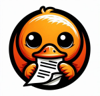

In [ ]:
# Extract and display the first image
from IPython.display import Image, display

for item, _ in doc_enhanced.iterate_items():
    if item.label == "picture":
        image_data = item.image

        # Get the image URI
        uri = str(image_data.uri)

        # Display the image using IPython
        display(Image(url=uri))
        break

In [ ]:
from docling.datamodel.pipeline_options import PdfPipelineOptions, TableFormerMode
from docling.datamodel.base_models import InputFormat
from docling.document_converter import PdfFormatOption

# Enhanced table processing for complex layouts
pipeline_options = PdfPipelineOptions()
pipeline_options.table_structure_options.mode = TableFormerMode.ACCURATE

# Create converter with enhanced table processing
converter_enhanced = DocumentConverter(
    format_options={
        InputFormat.PDF: PdfFormatOption(pipeline_options=pipeline_options)
    }
)

result_enhanced = converter_enhanced.convert("https://arxiv.org/pdf/2408.09869")
doc_enhanced = result_enhanced.document

[INFO] 2026-02-06 08:52:43,328 [RapidOCR] base.py:22: Using engine_name: torch
[INFO] 2026-02-06 08:52:43,328 [RapidOCR] device_config.py:50: Using CPU device
[INFO] 2026-02-06 08:52:43,338 [RapidOCR] download_file.py:60: File exists and is valid: D:\Git\docling_demo\.venv\Lib\site-packages\rapidocr\models\ch_PP-OCRv4_det_infer.pth
[INFO] 2026-02-06 08:52:43,338 [RapidOCR] main.py:50: Using D:\Git\docling_demo\.venv\Lib\site-packages\rapidocr\models\ch_PP-OCRv4_det_infer.pth
[INFO] 2026-02-06 08:52:43,328 [RapidOCR] device_config.py:50: Using CPU device
[INFO] 2026-02-06 08:52:43,338 [RapidOCR] download_file.py:60: File exists and is valid: D:\Git\docling_demo\.venv\Lib\site-packages\rapidocr\models\ch_PP-OCRv4_det_infer.pth
[INFO] 2026-02-06 08:52:43,338 [RapidOCR] main.py:50: Using D:\Git\docling_demo\.venv\Lib\site-packages\rapidocr\models\ch_PP-OCRv4_det_infer.pth
[INFO] 2026-02-06 08:52:43,425 [RapidOCR] base.py:22: Using engine_name: torch
[INFO] 2026-02-06 08:52:43,425 [RapidOCR

In [ ]:
first_table = element_types["table"][0]
# Export to DataFrame and show raw table (enhanced parsing)
table_df = first_table.export_to_dataframe(doc=doc_enhanced)
print(table_df.to_markdown())

# Expanded example for enhanced parsing (smart splitting enabled)
from table_utils import split_and_explode, detect_multivalue_columns
pattern = r"\s*(?:;|,|/|\n)\s*"

candidate_cols = detect_multivalue_columns(table_df)
if candidate_cols:
    expanded = split_and_explode(table_df, candidate_cols, delimiter_regex=pattern, mode="pairwise", smart=True)
    print("\nExpanded table (pairwise, smart=True) with one value per cell:")
    print(expanded.to_markdown())
else:
    print("No multi-valued columns detected; table unchanged.")

|    | CPU.                    | Thread budget.   | native backend.TTS   | native backend.Pages/s   | native backend.Mem   | pypdfium backend.TTS   | pypdfium backend.Pages/s   | pypdfium backend.Mem   |
|---:|:------------------------|:-----------------|:---------------------|:-------------------------|:---------------------|:-----------------------|:---------------------------|:-----------------------|
|  0 | Apple M3 Max (16 cores) | 4 16             | 177 s 167 s          | 1.27 1.34                | 6.20 GB              | 103 s 92 s             | 2.18 2.45                  | 2.56 GB                |
|  1 | Intel(R) Xeon E5-2690   | 4 16             | 375 s 244 s          | 0.60 0.92                | 6.16 GB              | 239 s 143 s            | 0.94 1.57                  | 2.42 GB                |

Expanded table (pairwise, smart=True) with one value per cell:
|    | CPU.                    |   Thread budget. | native backend.TTS   |   native backend.Pages/s | native backend.Mem

In [ ]:
# from docling.datamodel.pipeline_options import PictureDescriptionVlmOptions

# # AI-powered content enrichment
# pipeline_options = PdfPipelineOptions(
#     do_picture_description=True,  # AI-generated image descriptions
#     picture_description_options=PictureDescriptionVlmOptions(
#         repo_id="ibm-granite/granite-docling-258M",
#         prompt="Describe this picture. Be precise and concise.",
#     ),
#     generate_picture_images=True,
# )

# converter_enhanced = DocumentConverter(
#     format_options={
#         InputFormat.PDF: PdfFormatOption(pipeline_options=pipeline_options)
#     }
# )

# result_enhanced = converter_enhanced.convert("https://arxiv.org/pdf/2408.09869")
# doc_enhanced = result_enhanced.document
from docling.datamodel.pipeline_options import PictureDescriptionVlmOptions

# AI-powered content enrichment
pipeline_options = PdfPipelineOptions(
    do_picture_description=True,  # AI-generated image descriptions
    picture_description_options=PictureDescriptionVlmOptions(
        repo_id="HuggingFaceTB/SmolVLM-256M-Instruct",
        prompt="Describe this picture. Be precise and concise.",
    ),
    generate_picture_images=True,
    enable_parallel_processing=True,
    do_table_structure=True
)

converter_enhanced = DocumentConverter(
    format_options={
        InputFormat.PDF: PdfFormatOption(pipeline_options=pipeline_options)
    }
)

result_enhanced = converter_enhanced.convert("https://arxiv.org/pdf/2408.09869")
doc_enhanced = result_enhanced.document

[INFO] 2026-02-06 08:53:03,258 [RapidOCR] base.py:22: Using engine_name: torch
[INFO] 2026-02-06 08:53:03,259 [RapidOCR] device_config.py:50: Using CPU device
[INFO] 2026-02-06 08:53:03,267 [RapidOCR] download_file.py:60: File exists and is valid: D:\Git\docling_demo\.venv\Lib\site-packages\rapidocr\models\ch_PP-OCRv4_det_infer.pth
[INFO] 2026-02-06 08:53:03,268 [RapidOCR] main.py:50: Using D:\Git\docling_demo\.venv\Lib\site-packages\rapidocr\models\ch_PP-OCRv4_det_infer.pth
[INFO] 2026-02-06 08:53:03,259 [RapidOCR] device_config.py:50: Using CPU device
[INFO] 2026-02-06 08:53:03,267 [RapidOCR] download_file.py:60: File exists and is valid: D:\Git\docling_demo\.venv\Lib\site-packages\rapidocr\models\ch_PP-OCRv4_det_infer.pth
[INFO] 2026-02-06 08:53:03,268 [RapidOCR] main.py:50: Using D:\Git\docling_demo\.venv\Lib\site-packages\rapidocr\models\ch_PP-OCRv4_det_infer.pth
[INFO] 2026-02-06 08:53:03,749 [RapidOCR] base.py:22: Using engine_name: torch
[INFO] 2026-02-06 08:53:03,750 [RapidOCR

In [ ]:
second_picture = doc_enhanced.pictures[1]

print(f"Caption: {second_picture.caption_text(doc=doc_enhanced)}")

# Check for annotations
for annotation in second_picture.annotations:
    print(annotation.text)

Caption: Figure 1: Sketch of Docling's default processing pipeline. The inner part of the model pipeline is easily customizable and extensible.
The image is a flowchart that represents a sequence of steps, each representing a different process or action. The flowchart is structured in a logical and sequential manner, with each step connected to the previous one. Here is a detailed description of the flowchart:

### Flowchart Description:

#### Step 1: **Step 1: **

- **Description**: The flowchart is a sequential process that involves the following steps:
- **Description**: The process is described as follows:
- **Description**: The process is described as follows:
- **Description**: The process is described as follows:
- **Description**: The process is described as follows:
- **Description**: The process is described as follows:
- **Description**: The process is described as follows:
- **Description**: The process is described as follows:
- **Description**: The process is described as

<ipython-input-33-bba97d260752>:7: DeprecationWarning: Field `annotations` is deprecated; use `meta` instead.
  for annotation in second_picture.annotations:
